# Breif analysis of adult HIV reported cases according to  the WHO from 2008-2028

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [9]:
df1 =pd.read_csv("cases.csv")

In [10]:
df1.shape

(680, 7)

In [11]:
df1.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
1,Albania,2018,na,NaN,NaN,NaN,Europe
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas


In [12]:
df1.isnull().sum

<bound method DataFrame.sum of      Country   Year  Count  Count_median  Count_min  Count_max  WHO Region
0      False  False  False         False      False      False       False
1      False  False  False          True       True       True       False
2      False  False  False         False      False      False       False
3      False  False  False         False      False      False       False
4      False  False  False         False      False      False       False
..       ...    ...    ...           ...        ...        ...         ...
675    False  False  False          True       True       True       False
676    False  False  False         False      False      False       False
677    False  False  False         False      False      False       False
678    False  False  False         False      False      False       False
679    False  False  False         False      False      False       False

[680 rows x 7 columns]>

In [13]:
df2 = df1.dropna()
df2.isnull().sum

<bound method DataFrame.sum of      Country   Year  Count  Count_median  Count_min  Count_max  WHO Region
0      False  False  False         False      False      False       False
2      False  False  False         False      False      False       False
3      False  False  False         False      False      False       False
4      False  False  False         False      False      False       False
5      False  False  False         False      False      False       False
..       ...    ...    ...           ...        ...        ...         ...
674    False  False  False         False      False      False       False
676    False  False  False         False      False      False       False
677    False  False  False         False      False      False       False
678    False  False  False         False      False      False       False
679    False  False  False         False      False      False       False

[556 rows x 7 columns]>

In [14]:
df2.describe()

,Year,Count_median,Count_min,Count_max
count,556.000000,556.000000,556.000000,556.000000
mean,2008.235612,2.029317,1.762770,2.303058
std,6.640869,4.579652,4.117482,4.976971
min,2000.000000,0.100000,0.100000,0.100000
25%,2003.750000,0.100000,0.100000,0.100000
50%,2007.500000,0.400000,0.300000,0.500000
75%,2010.000000,1.500000,1.200000,1.900000
max,2018.000000,27.400000,25.200000,29.300000


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556 entries, 0 to 679
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       556 non-null    object 
 1   Year          556 non-null    int64  
 2   Count         556 non-null    object 
 3   Count_median  556 non-null    float64
 4   Count_min     556 non-null    float64
 5   Count_max     556 non-null    float64
 6   WHO Region    556 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 34.8+ KB


In [16]:
df2.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas
5,Armenia,2018,0.2[0.1–0.2],0.2,0.1,0.2,Europe


In [57]:
df2.loc[:, 'Count_median'] = pd.to_numeric(df2['Count_median'], errors='coerce')

In [18]:
df2 = df2.dropna(subset=['Count_median'])

In [19]:
sns.set(color_codes=True)
sns.set_palette("pastel")

In [20]:
df3_region = df2.groupby(["WHO Region", "Year"])['Count_median'].mean()


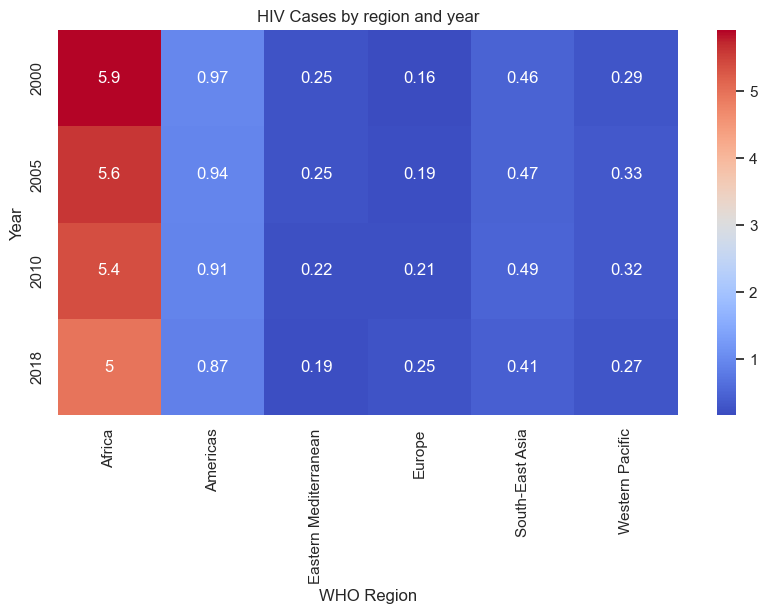

In [21]:
fig=plt.figure(figsize=(10,5))
sns.heatmap(df3_region.unstack(level=0), cmap='coolwarm', annot=True).set_title("HIV Cases by region and year");
plt.show()

**From the heatmap we can clearly see that from the year 2008-2018 Africa had the most HIV cases reported, And Europe had the least number of reported cases.
However Africa showed a decreasing number of reported cases while Europe showed an increasing number of reported cases, and the other countries were flactuation.**

In [23]:
df2.head()

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
3,Angola,2018,2.0[1.7–2.3],2.0,1.7,2.3,Africa
4,Argentina,2018,0.4[0.4–0.4],0.4,0.4,0.4,Americas
5,Armenia,2018,0.2[0.1–0.2],0.2,0.1,0.2,Europe


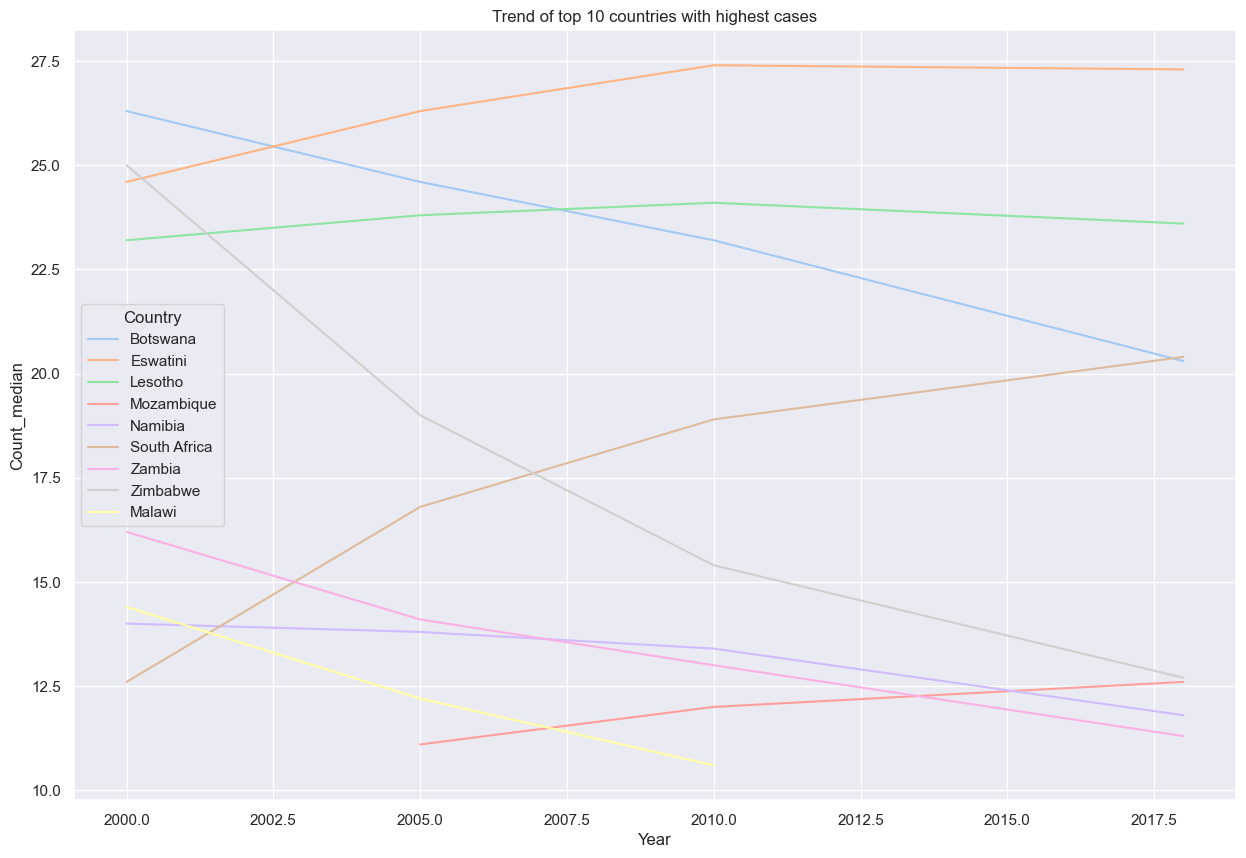

In [24]:
df4_by_country =df1[df1["Count_median"]>=10]
fig= plt.figure(figsize=(15,10))

sns.lineplot(data=df4_by_country,x="Year",y="Count_median",hue="Country").set_title("Trend of top 10 countries with highest cases")
plt.show()

**From the above line graph we can see a few important things about the countries. South Africa is the only country showing an increase over the years, 
Eswatini has always had a high  number of reported HIV cases it even peaked in 2010, Malawi shows the least number of reported cases 
and those cases have been constantly decreasing over the years.**

### Number of countries with the least number of cases reported.

In [27]:
df1.nsmallest(10,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
0,Afghanistan,2018,0.1[0.1–0.1],0.1,0.1,0.1,Eastern Mediterranean
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
6,Australia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Western Pacific
11,Bangladesh,2018,0.1[0.1–0.1],0.1,0.1,0.1,South-East Asia
19,Bosnia and Herzegovina,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
23,Bulgaria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
35,Comoros,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
39,Croatia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
42,Czechia,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe
45,Denmark,2018,0.1[0.1–0.1],0.1,0.1,0.1,Europe


In [28]:
df1.nlargest(15,"Count_median")

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
224,Eswatini,2010,27.4[25.2–29.3],27.4,25.2,29.3,Africa
54,Eswatini,2018,27.3[25.1–29.0],27.3,25.1,29.0,Africa
394,Eswatini,2005,26.3[23.9–27.8],26.3,23.9,27.8,Africa
530,Botswana,2000,26.3[25.1–27.2],26.3,25.1,27.2,Africa
679,Zimbabwe,2000,25.0[21.2–28.3],25.0,21.2,28.3,Africa
360,Botswana,2005,24.6[22.1–25.9],24.6,22.1,25.9,Africa
564,Eswatini,2000,24.6[23.0–26.5],24.6,23.0,26.5,Africa
259,Lesotho,2010,24.1[22.7–24.9],24.1,22.7,24.9,Africa
429,Lesotho,2005,23.8[22.9–24.8],23.8,22.9,24.8,Africa
89,Lesotho,2018,23.6[21.2–24.7],23.6,21.2,24.7,Africa


### Number of countries with the highest number of cases reported.

**Africa had the highest number of reported cases.**

In [31]:
Africa = df1[df1["WHO Region"]=="Africa"]
Africa[Africa["Count_median"]==Africa["Count_median"].max()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
224,Eswatini,2010,27.4[25.2–29.3],27.4,25.2,29.3,Africa


**In 2010 Eswatini peaked.**

In [33]:
Africa = df1[df1["WHO Region"]=="Africa"]
Africa[Africa["Count_median"]==Africa["Count_median"].min()]

,Country,Year,Count,Count_median,Count_min,Count_max,WHO Region
2,Algeria,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
35,Comoros,2018,0.1[0.1–0.1],0.1,0.1,0.1,Africa
172,Algeria,2010,0.1[0.1–0.1],0.1,0.1,0.1,Africa
205,Comoros,2010,0.1[0.1–0.1],0.1,0.1,0.1,Africa
342,Algeria,2005,0.1[0.1–0.1],0.1,0.1,0.1,Africa
375,Comoros,2005,0.1[0.1–0.1],0.1,0.1,0.1,Africa
512,Algeria,2000,0.1[0.1–0.1],0.1,0.1,0.1,Africa
545,Comoros,2000,0.1[0.1–0.1],0.1,0.1,0.1,Africa
